In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 #opencv-python
import os
import PIL
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.models import Sequential

In [8]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)#untar True unzips a file

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir) #create a path from string
data_dir

WindowsPath('datasets/flower_photos')

In [ ]:
len(list(data_dir.rglob('*.jpg'))) #goes thru all files in current directory as well as sub-directory to search for .jpg files at any depth

3670

In [15]:
roses = list(data_dir.glob('flower_photos/roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

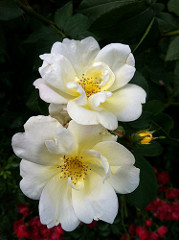

In [17]:
PIL.Image.open(str(roses[0]))

In [18]:
tulips = list(data_dir.glob('flower_photos/tulips/*'))
tulips[:5]

[WindowsPath('datasets/flower_photos/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

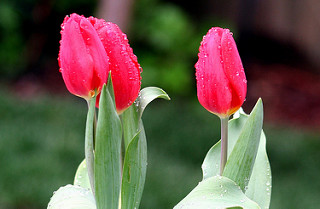

In [19]:
PIL.Image.open(str(tulips[0]))

In [20]:
flowers_images_dict = {
    'roses': list(data_dir.glob('flower_photos/roses/*')),
    'tulips': list(data_dir.glob('flower_photos/tulips/*')),
    'daisy': list(data_dir.glob('flower_photos/daisy/*')),
    'dandelion': list(data_dir.glob('flower_photos/dandelion/*')),
    'sunflowers': list(data_dir.glob('flower_photos/sunflowers/*'))
}

In [21]:
flowers_images_dict['daisy']

[WindowsPath('datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos

In [22]:
flowers_label_dict = {
    'roses': 0,
    'tulips':1,
    'daisy': 2,
    'dandelion':3,
    'sunflowers':4

}

In [23]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [ ]:
img = cv2.imread(flowers_images_dict['roses'][0]) #opencv helps to convert image into numpy array

In [25]:
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], shape=(240, 179, 3), dtype=uint8)

In [ ]:
cv2.resize(img, (180,180)).shape #since different images have different sizes, this method helps in resizing the images into a specific size

(180, 180, 3)

In [ ]:
for flower_name, images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))

roses
641
tulips
799
daisy
633
dandelion
898
sunflowers
699


In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image)) #converting images into an array
        resized_image = cv2.resize(img, (180,180)) #resize image as ML requires training samples to be of same dimension
        X.append(resized_image)#numpy array is saved into list X
        y.append(flowers_label_dict[flower_name]) #flower label is saved into list y

In [30]:
X = np.array(X)
y = np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.25)

In [32]:
#Scaling
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [37]:
model = keras.models.Sequential([
    #cnn
    keras.layers.Conv2D(16, 3, padding='same', activation = 'relu'),#16 filters with 3*3 filter each (number is trial and error)
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation = 'relu'),#32 filters with 3*3 filter each
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation = 'relu'),#64 filters with 3*3 filter each
    keras.layers.MaxPool2D(),

    #dense ann
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5) #default is linear activation for the output layer
])

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.4415 - loss: 1.3205
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 177ms/step - accuracy: 0.6076 - loss: 0.9813
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 183ms/step - accuracy: 0.6860 - loss: 0.8279
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 206ms/step - accuracy: 0.7591 - loss: 0.6449
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - accuracy: 0.8427 - loss: 0.4351
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.9175 - loss: 0.2530
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.9586 - loss: 0.1285
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.9749 - loss: 0.0902
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - accuracy: 0.9844 - loss: 0.0609
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 176ms/step - accuracy: 0.9887 - loss: 0.0481


In [38]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6427 - loss: 1.7325


[1.7324750423431396, 0.6427015066146851]

high training accuracy and low test accuracy --> overfitting

Overfitting can be addressed using Data Augmentation

In [39]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


array([[-1.29662240e+00, -2.73133469e+00, -3.15456867e+00,
        -6.45094737e-03,  4.53700352e+00],
       [ 7.02799129e+00,  4.44669485e+00, -9.98983479e+00,
        -1.30234385e+01, -2.61406517e+00],
       [-3.07128024e+00, -4.71553707e+00,  1.07253723e+01,
        -6.37065619e-02,  8.73247862e-01],
       ...,
       [ 2.87513137e-01, -3.20718122e+00,  1.15676105e+00,
        -1.15926099e+00, -8.81197572e-01],
       [-1.03191100e-01, -1.36129618e+00,  6.19420815e+00,
        -4.73827314e+00,  3.01360250e+00],
       [-5.39115667e+00, -2.21478033e+00, -4.56958562e-01,
         1.06407995e+01, -7.16030359e+00]], shape=(918, 5), dtype=float32)

In [40]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.8849829e-03, 6.8715622e-04, 4.5003605e-04, 1.0482320e-02,
       9.8549557e-01], dtype=float32)>

In [41]:
np.argmax(score)

np.int64(4)

In [42]:
y_test[0]

np.int64(1)

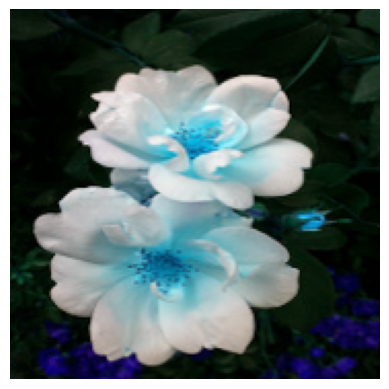

In [44]:
plt.axis("off")
plt.imshow(X[0])

In [ ]:

data_augmentation = keras.Sequential([
    keras.layers.RandomZoom(0.3)
])#RandomContrast(), RandomRotation()


In [48]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[11.49358   , 25.873499  , 14.66828   ],
        [10.468474  , 24.992575  , 13.622755  ],
        [10.35099   , 24.600405  , 13.048199  ],
        ...,
        [22.328417  , 48.19249   , 32.40562   ],
        [20.29675   , 46.142467  , 30.471449  ],
        [18.934536  , 45.048195  , 28.965057  ]],

       [[14.747064  , 30.708418  , 18.533718  ],
        [13.220101  , 30.116882  , 17.        ],
        [14.935279  , 31.758087  , 17.876215  ],
        ...,
        [22.220747  , 48.375984  , 33.213844  ],
        [23.975384  , 49.31237   , 34.872166  ],
        [22.091772  , 48.97614   , 32.14959   ]],

       [[15.496537  , 29.8253    , 17.66092   ],
        [13.235009  , 29.240667  , 16.175945  ],
        [14.125105  , 30.892338  , 17.010468  ],
        ...,
        [17.815838  , 44.169617  , 28.471916  ],
        [17.600359  , 44.225266  , 27.578403  ],
        [18.509346  , 46.854313  , 27.614662  ]],

       ...,

     

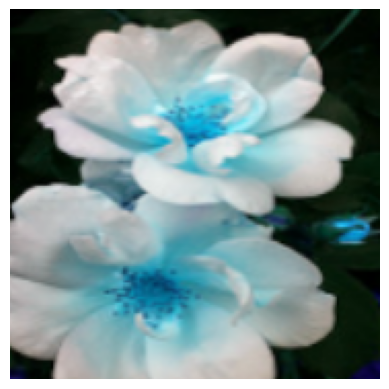

In [49]:
plt.axis("off")
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [ ]:
data_augmentation_final = keras.Sequential([ #same as keras.models.Sequential([])
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1)
])

In [53]:
model = keras.models.Sequential([
    data_augmentation_final, #data augmentation to reduce overfitting
    #cnn
    keras.layers.Conv2D(16, 3, padding='same', activation = 'relu'),#16 filters with 3*3 filter each (number is trial and error)
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation = 'relu'),#32 filters with 3*3 filter each
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation = 'relu'),#64 filters with 3*3 filter each
    keras.layers.MaxPool2D(),

    keras.layers.Dropout(0.2),#drop out layer with 20% neurons dropped

    #dense ann
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5) #default is linear activation for the output layer
])

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 245ms/step - accuracy: 0.4161 - loss: 1.3288
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 228ms/step - accuracy: 0.5858 - loss: 1.0351
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 219ms/step - accuracy: 0.6352 - loss: 0.9282
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 217ms/step - accuracy: 0.6617 - loss: 0.8678
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 244ms/step - accuracy: 0.6701 - loss: 0.8350
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 244ms/step - accuracy: 0.6948 - loss: 0.7677
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 264ms/step - accuracy: 0.7209 - loss: 0.7344
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 260ms/step - accuracy: 0.7322 - loss: 0.6930
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 284ms/step - accuracy: 0.7427 - loss: 0.6609
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 257ms/step - accuracy: 0.7442 - loss: 0.6467


In [54]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7342 - loss: 0.7435


[0.7435019612312317, 0.7342047691345215]

The accuracy is improved after data augmentation